In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Configuración de gráficos en Jupyter
plt.style.use("default")
plt.rcParams["figure.figsize"] = (10,6)

# 2. Cargar dataset
df = pd.read_csv("C:/Users/lmosquen/Desktop/Python/Ciencia de datos/Día 8/medallas.csv")
df.head()


,Oro,Plata,Bronce,Total,Pais
0,NaN,1.0,2.0,3.0,Argentina
1,NaN,2.0,2.0,4.0,Armenia
2,17,7.0,22.0,46.0,Australia
3,1,1.0,5.0,7.0,Austria
4,NaN,3.0,4.0,7.0,Azerbaijan


In [3]:
# 3. Exploración inicial
df.info()
df.describe()

# Verificar valores nulos
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Oro     65 non-null     object 
 1   Plata   68 non-null     float64
 2   Bronce  75 non-null     float64
 3   Total   92 non-null     float64
 4   Pais    92 non-null     object 
dtypes: float64(3), object(2)
memory usage: 3.8+ KB


Oro       28
Plata     25
Bronce    18
Total      1
Pais       1
dtype: int64

In [7]:
# 4. Limpieza básica

# Rellenar NaN con 0 en columnas numéricas
df[["Oro","Plata","Bronce","Total"]] = df[["Oro","Plata","Bronce","Total"]].fillna(0)
# Convertir a números y forzar errores a NaN
cols = ["Oro","Plata","Bronce","Total"]
df[cols] = df[cols].apply(pd.to_numeric, errors="coerce")

# Rellenar nuevamente NaN con 0
df[cols] = df[cols].fillna(0).astype(int)

df.head()



,Oro,Plata,Bronce,Total,Pais
0,0,1,2,3,Argentina
1,0,2,2,4,Armenia
2,17,7,22,46,Australia
3,1,1,5,7,Austria
4,0,3,4,7,Azerbaijan


In [8]:
# Detectar filas problemáticas
for col in cols:
    errores = df[pd.to_numeric(df[col], errors="coerce").isna() & df[col].notna()]
    if not errores.empty:
        print(f"Valores no numéricos en {col}:")
        display(errores[[col,"Pais"]])


In [9]:
# 5. Métricas descriptivas

# País con más medallas de Oro
top_oro = df.sort_values("Oro", ascending=False).head(10)
print("Top 10 países con más medallas de oro:")
display(top_oro[["Pais","Oro"]])

# País con más medallas Totales
top_total = df.sort_values("Total", ascending=False).head(10)
print("Top 10 países con más medallas totales:")
display(top_total[["Pais","Total"]])


Top 10 países con más medallas de oro:


,Pais,Oro
25,Estados Unidos de America,39
72,Republica Popular de China,38
46,Japon,27
34,Gran Bretana,22
2,Australia,17
11,Brazil,7
14,Canada,7
19,Cuba,7
61,New Zealand,7
38,Hungary,6


Top 10 países con más medallas totales:


,Pais,Total
25,Estados Unidos de America,113
72,Republica Popular de China,88
73,ROC,71
34,Gran Bretana,65
46,Japon,58
2,Australia,46
32,Germany,37
60,Netherlands,36
30,France,33
14,Canada,24


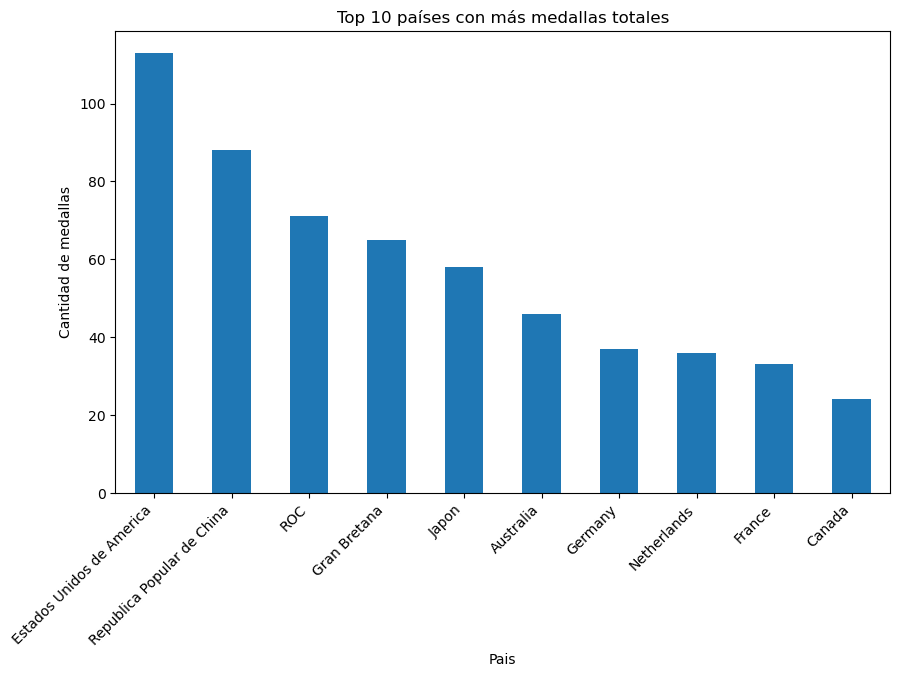

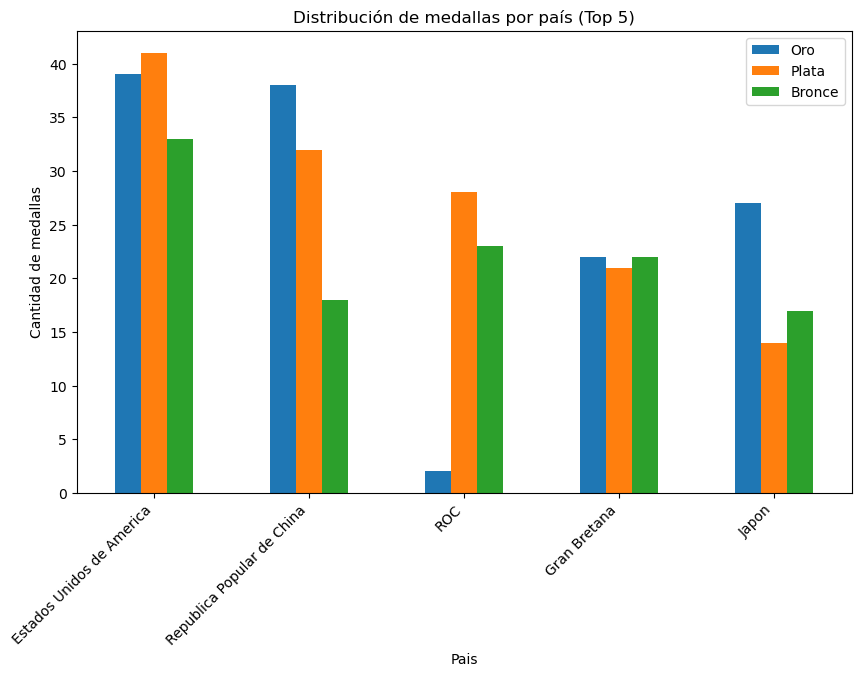

In [12]:
# 6. Visualizaciones

# Gráfico de barras - Top 10 países con más medallas totales
ax = top_total.plot.bar(x="Pais", y="Total", legend=False)
plt.title("Top 10 países con más medallas totales")
plt.ylabel("Cantidad de medallas")
plt.xticks(rotation=45, ha="right")  # Rotar etiquetas a 45 grados
plt.show()


# Comparación Oro, Plata y Bronce - Top 5 países
top5 = df.sort_values("Total", ascending=False).head(5)
ax = top5.set_index("Pais")[["Oro","Plata","Bronce"]].plot(kind="bar")
plt.title("Distribución de medallas por país (Top 5)")
plt.ylabel("Cantidad de medallas")
plt.xticks(rotation=45, ha="right")  # Rotar etiquetas a 45 grados
plt.show()



In [13]:
# 7. Guardar dataset limpio
df.to_csv("C:/Users/lmosquen/Desktop/Python/Ciencia de datos/Día 8/medallas_clean.csv", index=False)
print("Archivo limpio guardado como medallas_clean.csv")


Archivo limpio guardado como medallas_clean.csv
